In [39]:
import pandas as pd
import numpy as np
import plotly.express as px

In [40]:
data = pd.read_csv('deliverytime.txt')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [42]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [43]:
##Calculating distance between latitudes and longitudes
#Distance between restaurant and delivery location

# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
  
# Calculate the distance between each pair of points
data['distance'] = np.nan

for i in range(len(data)):
    data.loc[i, 'distance'] = distcalculate(data.loc[i, 'Restaurant_latitude'], 
                                        data.loc[i, 'Restaurant_longitude'], 
                                        data.loc[i, 'Delivery_location_latitude'], 
                                        data.loc[i, 'Delivery_location_longitude'])

In [44]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


<AxesSubplot:xlabel='distance', ylabel='Time_taken(min)'>

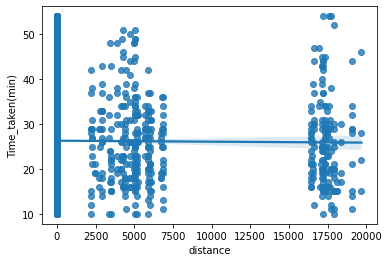

In [45]:
import seaborn as sns

sns.regplot(x=data['distance'], y=data['Time_taken(min)'])

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Time_taken(min)'>

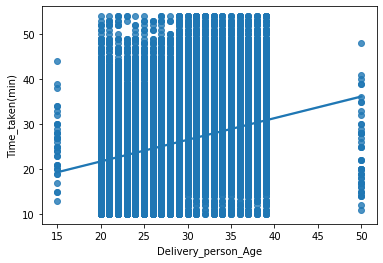

In [46]:
sns.regplot(x=data['Delivery_person_Age'], y=data['Time_taken(min)'])

<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='Time_taken(min)'>

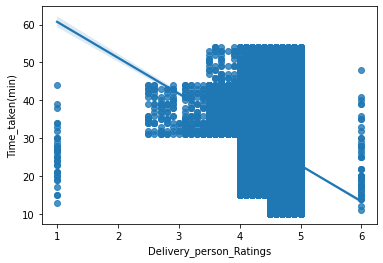

In [47]:
sns.regplot(x=data['Delivery_person_Ratings'], y=data['Time_taken(min)'])

<AxesSubplot:xlabel='Type_of_vehicle', ylabel='Time_taken(min)'>

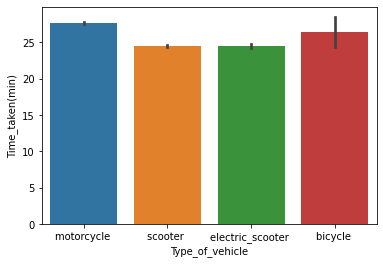

In [48]:
sns.barplot(x=data['Type_of_vehicle'], y=data['Time_taken(min)'])

<AxesSubplot:xlabel='Type_of_order', ylabel='Time_taken(min)'>

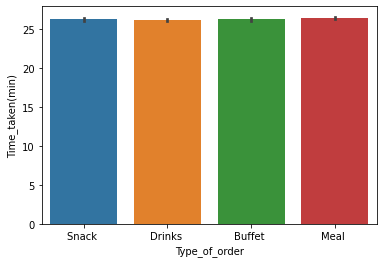

In [49]:
sns.barplot(x=data['Type_of_order'], y=data['Time_taken(min)'])

In [50]:
from sklearn.model_selection import train_test_split
X = data[['Delivery_person_Age', 'Delivery_person_Ratings', 'distance']]
y = data['Time_taken(min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)

# from sklearn.linear_model import LinearRegression
# model = LinearRegression(normalize = True)

DecisionTreeClassifier(max_depth=7)

In [52]:
from sklearn.metrics import accuracy_score
print("Training accuracy...", accuracy_score(y_train, model.predict(X_train)))
print("Testing accuracy...", accuracy_score(y_test, model.predict(X_test)))

# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn import metrics

# train_error = mean_squared_error(y_train, model.predict(X_train), squared=False)
# test_error = mean_squared_error(y_test, model.predict(X_test), squared=False)
# print("Train error...", train_error)
# print("Test error...", test_error)

Training accuracy... 0.08412971956760144
Testing accuracy... 0.06989325924842814
